## Project 3


## Interview questions: http://tcbanalytics.com/blog/testing-data-skills.html#.WFWApHeZOb-

# Importing Dependencies

In [1]:
%matplotlib inline
import os
import numpy as np
import sklearn
import pandas as pd
import seaborn as sns
import warnings
sns.set()

## Parsing the data

In [2]:
beer_df=pd.read_csv('beer_reviews.csv')
beer_df.columns

Index(['brewery_id', 'brewery_name', 'review_time', 'review_overall',
       'review_aroma', 'review_appearance', 'review_profilename', 'beer_style',
       'review_palate', 'review_taste', 'beer_name', 'beer_abv',
       'beer_beerid'],
      dtype='object')

In [3]:
beer_df.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [4]:
# drop columns
beer_df.drop(['brewery_id', 'review_time'], axis=1, inplace=True)
beer_df.head()

,brewery_name,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,Vecchio Birraio,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,Vecchio Birraio,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,Vecchio Birraio,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,Vecchio Birraio,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,Caldera Brewing Company,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [5]:
reviews = dict()
for col in beer_df.columns:
    reviews.update({
            col:beer_df[col]
        })

In [6]:
reviews


{'beer_abv': 0          5.0
 1          6.2
 2          6.5
 3          5.0
 4          7.7
 5          4.7
 6          4.7
 7          4.7
 8          4.7
 9          4.7
 10         3.5
 11         4.7
 12         4.7
 13         4.7
 14         4.7
 15         7.2
 16         7.2
 17         5.6
 18         3.5
 19         7.4
 20         7.4
 21         7.4
 22         7.4
 23         7.4
 24         7.4
 25         7.4
 26         7.4
 27         7.4
 28         7.4
 29         7.4
           ... 
 1586584    5.8
 1586585    5.8
 1586586    5.8
 1586587    NaN
 1586588    8.0
 1586589    8.0
 1586590    8.0
 1586591    8.0
 1586592    5.2
 1586593    5.2
 1586594    6.0
 1586595    5.0
 1586596    NaN
 1586597    NaN
 1586598    NaN
 1586599    9.0
 1586600    5.2
 1586601    5.2
 1586602    5.2
 1586603    5.2
 1586604    5.2
 1586605    5.2
 1586606    5.2
 1586607    5.2
 1586608    5.2
 1586609    5.2
 1586610    5.2
 1586611    5.2
 1586612    5.2
 1586613    5.2
 Name: beer_

## Question 1: Which brewery produces the strongest beer?

In [7]:
# Which brewery produces the strongest beers by alcohol by volume (ABV%) ?

strongest_beers = ['beer_style', 'beer_abv']
ids = ['brewery_name', 'beer_name', 'beer_beerid']

#New df to find strongest beer by ABV
beer_abvs = beer_df[ids + strongest_beers]

beer_abvs = beer_abvs.dropna()

beer_abvs = beer_abvs.drop_duplicates('beer_beerid').sort_values(by="beer_abv", ascending=False)

beer_abvs.head(10)

,brewery_name,beer_name,beer_beerid,beer_style,beer_abv
12919,Schorschbräu,Schorschbräu Schorschbock 57%,73368,Eisbock,57.70
12939,Schorschbräu,Schorschbräu Schorschbock 43%,57856,Eisbock,43.00
746310,BrewDog,Sink The Bismarck!,57015,American Double / Imperial IPA,41.00
12934,Schorschbräu,Schorschbräu Schorschbock 40%,55712,Eisbock,39.44
996149,De Struise Brouwers,Black Damnation VI - Messy,70633,American Double / Imperial Stout,39.00
748332,BrewDog,Tactical Nuclear Penguin,54571,American Double / Imperial Stout,32.00
12918,Schorschbräu,Schorschbräu Schorschbock 31%,51466,Eisbock,30.86
1042320,Hair of the Dog Brewing Company / Brewery and ...,Dave,35197,English Barleywine,29.00
746420,BrewDog,Ghost Deer,74021,Belgian Strong Pale Ale,28.00
293578,Boston Beer Company (Samuel Adams),Samuel Adams Utopias,25759,American Strong Ale,27.00


In [8]:
# List all beers produced by brewery...highest ABV%
brewery_name = beer_abvs.iloc[0].brewery_name

brews = beer_abvs[beer_abvs.brewery_name == brewery_name]

brews

,brewery_name,beer_name,beer_beerid,beer_style,beer_abv
12919,Schorschbräu,Schorschbräu Schorschbock 57%,73368,Eisbock,57.70
12939,Schorschbräu,Schorschbräu Schorschbock 43%,57856,Eisbock,43.00
12934,Schorschbräu,Schorschbräu Schorschbock 40%,55712,Eisbock,39.44
12918,Schorschbräu,Schorschbräu Schorschbock 31%,51466,Eisbock,30.86
12917,Schorschbräu,Schorsch Weizen 16%,71004,Weizenbock,16.00
12911,Schorschbräu,Schorschbock,47421,Doppelbock,16.00
12928,Schorschbräu,Schorschbräu Donner Weizen,20169,Weizenbock,13.00
12914,Schorschbräu,Schorschbräu Donner Bock,15578,Doppelbock,13.00
12910,Schorschbräu,Schorschbock Ice 13,73357,Eisbock,13.00
12909,Schorschbräu,Schorschbräu Dunkles,32973,Munich Dunkel Lager,4.90


C:\Users\victo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


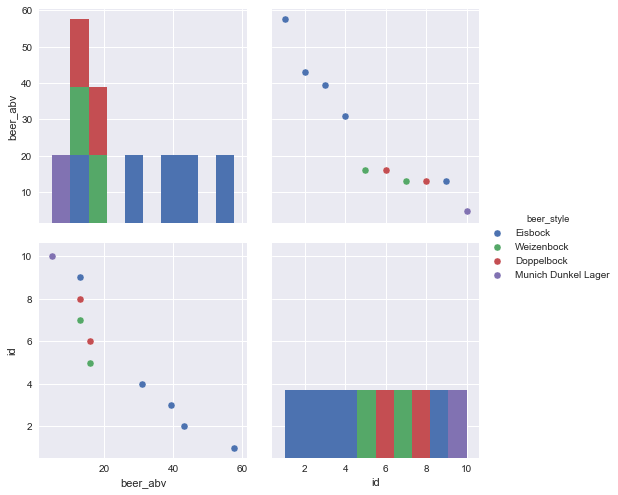

In [9]:
# plot beers by highest ABV
abvs = brews[['beer_name', 'beer_abv', 'beer_style']]
abvs['id'] = np.linspace(1,len(abvs), len(abvs))
sns.pairplot(data=abvs, hue='beer_style', size=3.5)
